## Brain Tumor Classification

In [60]:
import SimpleITK as sitk
import glob
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction import image
import numpy as np
import nipype
from nipype.interfaces.ants import N4BiasFieldCorrection
import ast
from pytictoc import TicToc
import scipy

In [27]:
def BiasCorrection(img_3d):
    n4 = N4BiasFieldCorrection()
    n4.inputs.dimension = 3
    n4.inputs.input_image = img_3d
    n4.inputs.n_iterations = [50,50,30,20]
    n4.run()

In [13]:
def getMaxLabelIndex(patno):
    label3dstk = sitk.ReadImage(Label_files[patno],sitk.sitkUInt16)
    label3d = sitk.GetArrayViewFromImage(label3dstk)
    
    array2 = []

    for i in range(0,label3d.shape[0]):
        array2.append(label3d[i].mean())

    return array2.index(max(array2))

In [4]:
def getMaxTumorIndex(patno):
    tumor3dstk = sitk.ReadImage(Tumor_files[patno],sitk.sitkUInt16)
    tumor3d = sitk.GetArrayViewFromImage(tumor3dstk)
    
    array1 = []

    for i in range(0,tumor3d.shape[0]):
        array1.append(tumor3d[i].mean())

    return array1.index(max(array1))

In [5]:
def CreatePatches(img_2d):
    df0 = pd.DataFrame()
    img_2d_resized = scipy.misc.imresize(img_2d,(32,32),interp = 'bilinear').astype('int16')
    for re in range(0,900):   
        im = image.extract_patches_2d(img_2d_resized, (5, 5))[re]
        rs = np.reshape(im,(1,9))
        df0 = df0.append(pd.DataFrame.from_records(rs))
    return df0.astype('int16')

In [34]:
def CreateTumorImageset():
    apd1 = []
    for fg in range(0,16):
        tumor = sitk.ReadImage(Tumor_files[fg],sitk.sitkUInt16)
        tumor_2d = sitk.GetArrayViewFromImage(tumor)[getMaxLabelIndex(fg)]
        apd1.append(np.array(tumor_2d))
    return np.array(apd1)

In [35]:
def CreateLabelImageset():
    apd2 = []
    for fg in range(0,16):
        label = sitk.ReadImage(Label_files[fg],sitk.sitkUInt16)
        label_2d = sitk.GetArrayViewFromImage(label)[getMaxLabelIndex(fg)]
        apd2.append(np.array(label_2d))
    return np.array(apd2)

In [102]:
input_X = CreateTumorImageset()
label_X = CreateLabelImageset()

In [115]:
input_X[1,].max()

1544.0

In [114]:
label_X.shape

(16, 240, 240, 1)

In [112]:
label_X[1,].max()

4.0

In [8]:
Tumor_files = glob.glob("BRATS2013/*/*T1c*/*T1c*.mha")
Label_files = glob.glob("BRATS2013/*/*OT*/*OT*.mha")

In [9]:
#Tumor_files[0]

In [19]:
tumor3d = sitk.ReadImage(Tumor_files[0],sitk.sitkInt16)

#plt.figure(figsize=(3.34,3.34))
tumor2d = sitk.GetArrayViewFromImage(tumor3d)[getMaxTumorIndex(0)]

plt.imshow(tumor2d)
#plt.axis('off')
#plt.savefig('pat5input.png')
plt.set_cmap('gray')
#plt.show()

In [21]:
#rra = []
#rra.append(tumor2d)

In [37]:
np.array(rra).shape

(2, 240, 240)

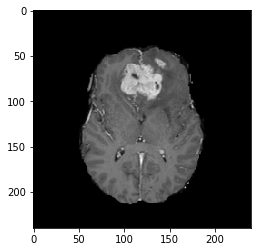

In [22]:
plt.imshow(tumor2d)
plt.show()

In [32]:
#BiasCorrection(Tumor_files[0])

In [30]:
corrected = glob.glob("*.mha")

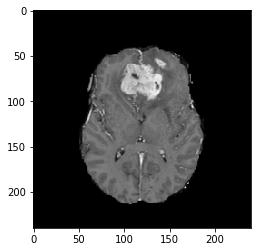

In [31]:
ctumor3d = sitk.ReadImage(corrected[0],sitk.sitkInt16)
#plt.figure(figsize=(3.34,3.34))
ctumor2d = sitk.GetArrayViewFromImage(ctumor3d)[getMaxTumorIndex(0)]
plt.imshow(ctumor2d)
plt.show()

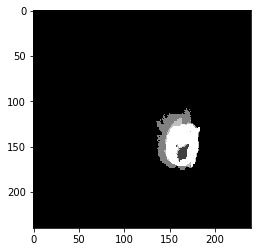

In [129]:
plt.imshow(label_X[1,:,:,0])
plt.show()

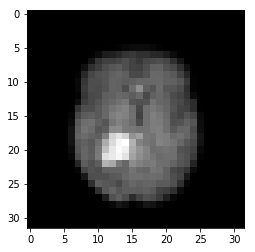

In [18]:
import scipy

plt.imshow(scipy.misc.imresize(tumor2d,(32,32),interp = 'bilinear'))
plt.show()

In [33]:
timer = TicToc()
timer.tic()
for i in range(0,20):
    BiasCorrection(Tumor_files[i])
timer.toc()

171221-01:58:44,227 interface INFO:
	 stdout 2017-12-21T01:58:44.226961:
171221-01:58:44,230 interface INFO:
	 stdout 2017-12-21T01:58:44.226961:Running N4 for 3-dimensional images.
171221-01:58:44,238 interface INFO:
	 stdout 2017-12-21T01:58:44.226961:
171221-01:58:44,242 interface INFO:
	 stdout 2017-12-21T01:58:44.226961:Mask not read.  Creating Otsu mask.
171221-01:58:46,278 interface INFO:
	 stdout 2017-12-21T01:58:46.278332:Current level = 1
171221-01:58:46,281 interface INFO:
	 stdout 2017-12-21T01:58:46.278332:  Iteration 1 (of 50).   Current convergence value = 0.000694505 (threshold = 0)
171221-01:58:46,786 interface INFO:
	 stdout 2017-12-21T01:58:46.785780:  Iteration 2 (of 50).   Current convergence value = 0.000683403 (threshold = 0)
171221-01:58:47,800 interface INFO:
	 stdout 2017-12-21T01:58:47.800147:  Iteration 3 (of 50).   Current convergence value = 0.000672907 (threshold = 0)
171221-01:58:48,303 interface INFO:
	 stdout 2017-12-21T01:58:48.303710:  Iteration 4 (o

171221-01:59:14,40 interface INFO:
	 stdout 2017-12-21T01:59:14.037556:  Iteration 1 (of 50).   Current convergence value = 0.000670558 (threshold = 0)
171221-01:59:14,550 interface INFO:
	 stdout 2017-12-21T01:59:14.550036:  Iteration 2 (of 50).   Current convergence value = 0.000645607 (threshold = 0)
171221-01:59:15,53 interface INFO:
	 stdout 2017-12-21T01:59:15.053419:  Iteration 3 (of 50).   Current convergence value = 0.00062162 (threshold = 0)
171221-01:59:15,557 interface INFO:
	 stdout 2017-12-21T01:59:15.557260:  Iteration 4 (of 50).   Current convergence value = 0.000599101 (threshold = 0)
171221-01:59:16,60 interface INFO:
	 stdout 2017-12-21T01:59:16.060658:  Iteration 5 (of 50).   Current convergence value = 0.000577777 (threshold = 0)
171221-01:59:16,564 interface INFO:
	 stdout 2017-12-21T01:59:16.564396:  Iteration 6 (of 50).   Current convergence value = 0.000557643 (threshold = 0)
171221-01:59:17,68 interface INFO:
	 stdout 2017-12-21T01:59:17.068305:  Iteration 7 (

171221-01:59:43,331 interface INFO:
	 stdout 2017-12-21T01:59:43.331474:  Iteration 4 (of 30).   Current convergence value = 0.0011652 (threshold = 0)
171221-01:59:43,836 interface INFO:
	 stdout 2017-12-21T01:59:43.835791:  Iteration 5 (of 30).   Current convergence value = 0.00110063 (threshold = 0)
171221-01:59:44,340 interface INFO:
	 stdout 2017-12-21T01:59:44.340346:  Iteration 6 (of 30).   Current convergence value = 0.00104238 (threshold = 0)
171221-01:59:44,844 interface INFO:
	 stdout 2017-12-21T01:59:44.843920:  Iteration 7 (of 30).   Current convergence value = 0.000986446 (threshold = 0)
171221-01:59:45,858 interface INFO:
	 stdout 2017-12-21T01:59:45.858371:  Iteration 8 (of 30).   Current convergence value = 0.000936181 (threshold = 0)
171221-01:59:46,362 interface INFO:
	 stdout 2017-12-21T01:59:46.361957:  Iteration 9 (of 30).   Current convergence value = 0.000891897 (threshold = 0)
171221-01:59:46,865 interface INFO:
	 stdout 2017-12-21T01:59:46.865402:  Iteration 10

171221-02:00:09,609 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:       Primary: (0x293d5b0) *
171221-02:00:09,613 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:       _1: (0x29426f0)
171221-02:00:09,617 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:     Indexed Inputs: 
171221-02:00:09,621 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:       0: Primary (0x293d5b0)
171221-02:00:09,625 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:       1: _1 (0x29426f0)
171221-02:00:09,629 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:     Required Input Names: Primary
171221-02:00:09,634 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:     NumberOfRequiredInputs: 1
171221-02:00:09,638 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:     Outputs: 
171221-02:00:09,642 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:       Primary: (0x2938870)
171221-02:00:09,646 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:     Indexed Outputs: 
171221-02:00:09,64

171221-02:00:10,38 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:         PointToIndexMatrix: 
171221-02:00:10,43 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:0.0338983 0 0
171221-02:00:10,47 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:0 0.0338983 0
171221-02:00:10,57 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:0 0 0.0540541
171221-02:00:10,67 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:
171221-02:00:10,72 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:         Inverse Direction: 
171221-02:00:10,77 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:1 0 0
171221-02:00:10,81 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:0 1 0
171221-02:00:10,88 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:0 0 1
171221-02:00:10,93 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:
171221-02:00:10,98 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:         PixelContainer: 
171221-02:00:10,103 interface INFO:
	 stdout 2017-12-21T02:00:09.572803:

171221-02:00:42,168 interface INFO:
	 stdout 2017-12-21T02:00:42.168445:  Iteration 37 (of 50).   Current convergence value = 0.000657297 (threshold = 0)
171221-02:00:42,672 interface INFO:
	 stdout 2017-12-21T02:00:42.672369:  Iteration 38 (of 50).   Current convergence value = 0.00064188 (threshold = 0)
171221-02:00:43,175 interface INFO:
	 stdout 2017-12-21T02:00:43.175785:  Iteration 39 (of 50).   Current convergence value = 0.000626669 (threshold = 0)
171221-02:00:43,679 interface INFO:
	 stdout 2017-12-21T02:00:43.679280:  Iteration 40 (of 50).   Current convergence value = 0.000612003 (threshold = 0)
171221-02:00:44,183 interface INFO:
	 stdout 2017-12-21T02:00:44.182983:  Iteration 41 (of 50).   Current convergence value = 0.000597744 (threshold = 0)
171221-02:00:44,686 interface INFO:
	 stdout 2017-12-21T02:00:44.686430:  Iteration 42 (of 50).   Current convergence value = 0.000584011 (threshold = 0)
171221-02:00:45,189 interface INFO:
	 stdout 2017-12-21T02:00:45.189779:  Ite

171221-02:01:08,423 interface INFO:
	 stdout 2017-12-21T02:01:08.422942:  Iteration 40 (of 50).   Current convergence value = 0.000666916 (threshold = 0)
171221-02:01:08,926 interface INFO:
	 stdout 2017-12-21T02:01:08.926543:  Iteration 41 (of 50).   Current convergence value = 0.000656636 (threshold = 0)
171221-02:01:09,430 interface INFO:
	 stdout 2017-12-21T02:01:09.429941:  Iteration 42 (of 50).   Current convergence value = 0.00064679 (threshold = 0)
171221-02:01:09,933 interface INFO:
	 stdout 2017-12-21T02:01:09.933549:  Iteration 43 (of 50).   Current convergence value = 0.000637312 (threshold = 0)
171221-02:01:10,437 interface INFO:
	 stdout 2017-12-21T02:01:10.436977:  Iteration 44 (of 50).   Current convergence value = 0.000627653 (threshold = 0)
171221-02:01:10,940 interface INFO:
	 stdout 2017-12-21T02:01:10.940573:  Iteration 45 (of 50).   Current convergence value = 0.000618088 (threshold = 0)
171221-02:01:11,444 interface INFO:
	 stdout 2017-12-21T02:01:11.444212:  Ite

171221-02:01:35,151 interface INFO:
	 stdout 2017-12-21T02:01:35.151362:  Iteration 13 (of 20).   Current convergence value = 0.0010453 (threshold = 0)


KeyboardInterrupt: 

#### Representation of Image in csv

In [19]:
pd.DataFrame.from_records(tumor2d).to_csv('Patient1Input.csv')

In [20]:
pd.DataFrame.from_records(image.extract_patches_2d(tumor2d, (3, 3))[0])

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0


0


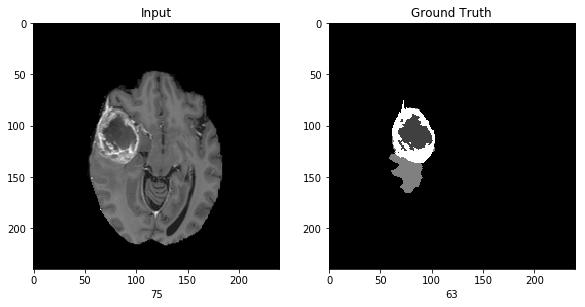

1


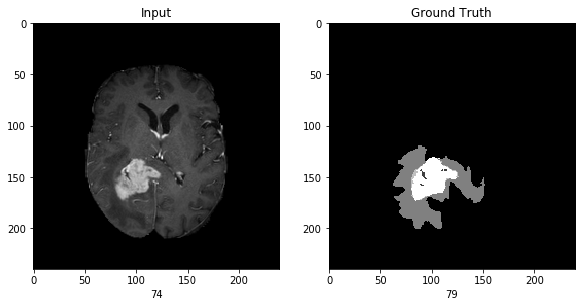

2


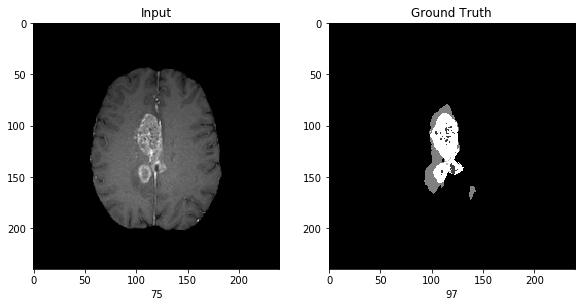

3


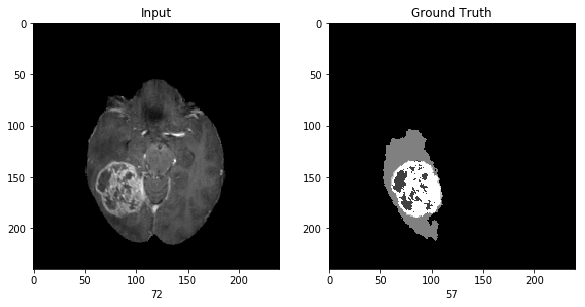

4


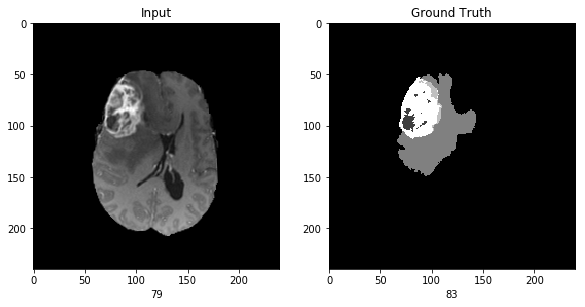

5


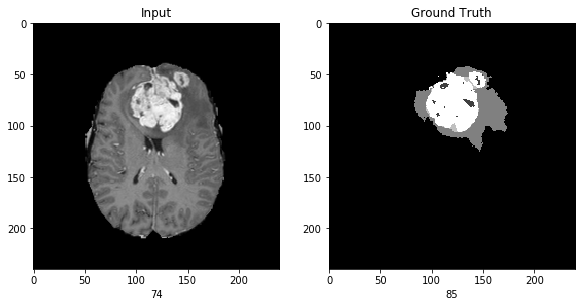

6


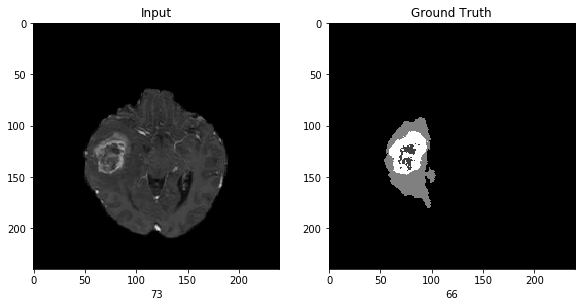

7


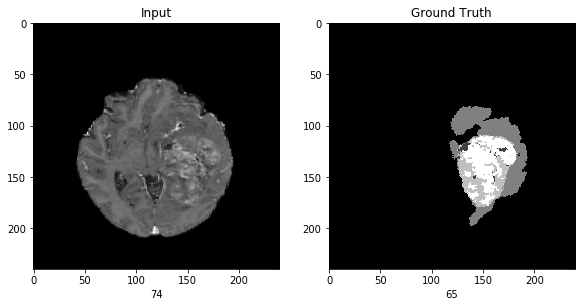

8


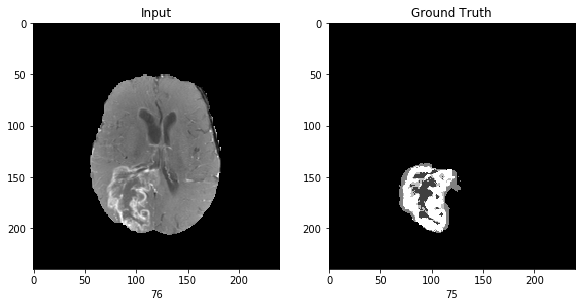

9


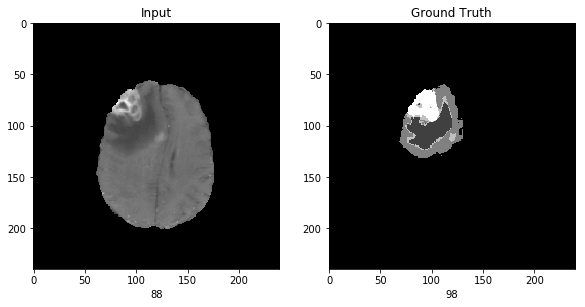

10


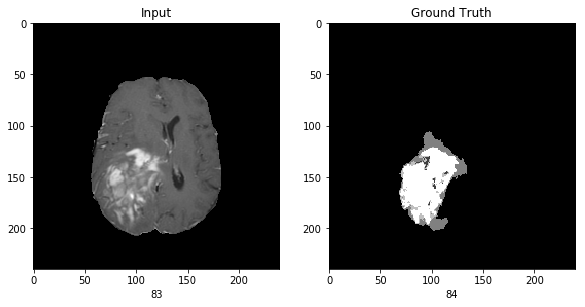

11


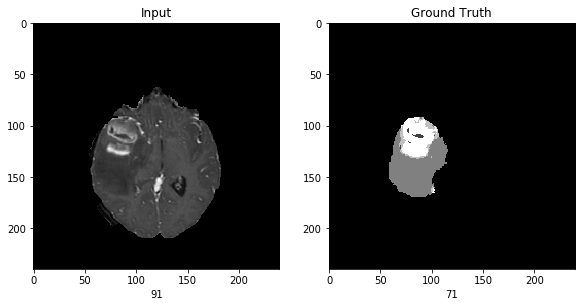

12


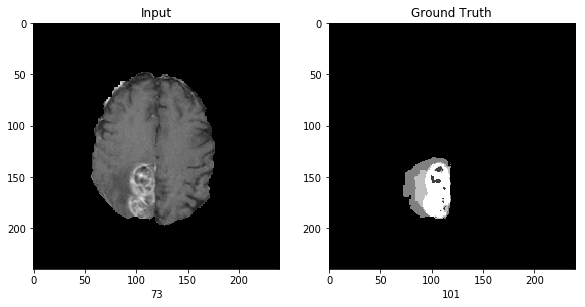

13


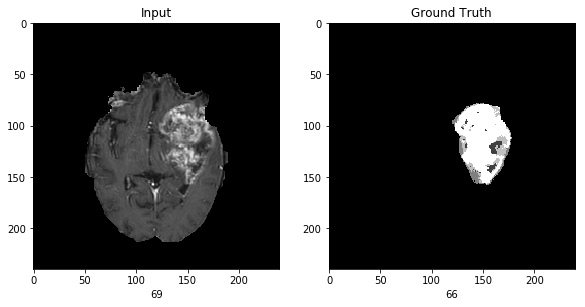

14


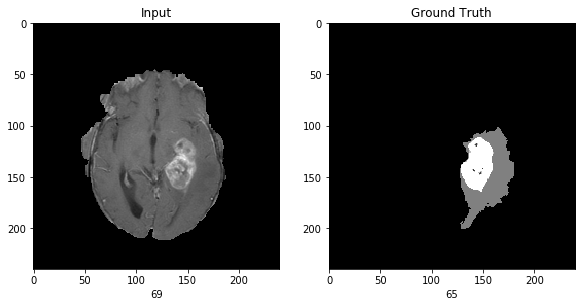

15


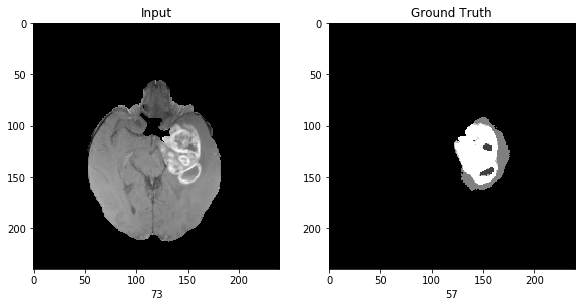

16


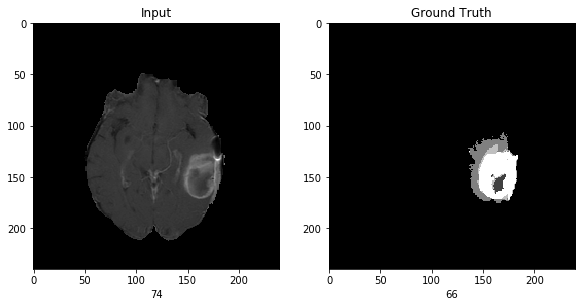

17


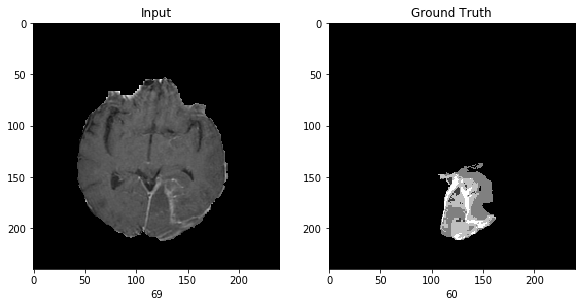

18


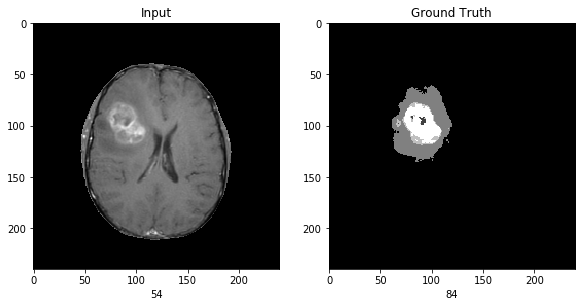

19


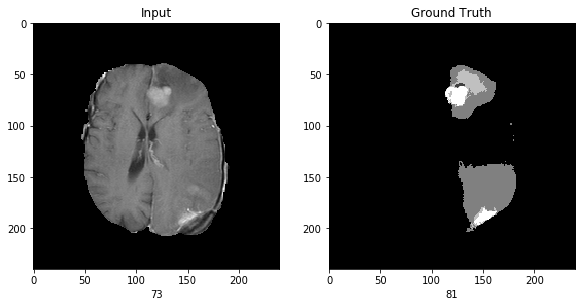

In [24]:
for itr in range(0,20):
#itr = 0
    tumor = sitk.ReadImage(Tumor_files[itr],sitk.sitkUInt16)
    label = sitk.ReadImage(Label_files[itr],sitk.sitkUInt16)

    tumor_2d = sitk.GetArrayViewFromImage(tumor)[getMaxLabelIndex(itr)]
    label_2d = sitk.GetArrayViewFromImage(label)[getMaxLabelIndex(itr)]

    plt.figure(figsize=(15,10))
    plt.subplot(131)
    plt.title('Input')
    plt.xlabel(getMaxTumorIndex(itr))
    plt.imshow(tumor_2d)
        #plt.axis('off')
    plt.set_cmap('gray')

    plt.subplot(132)
    plt.title('Ground Truth')
    plt.xlabel(getMaxLabelIndex(itr))
    plt.imshow(label_2d)
        #plt.axis('off')
    plt.set_cmap('gray')

    print(itr)
    plt.show()

In [25]:
tumor = sitk.ReadImage(Tumor_files[2],sitk.sitkUInt16)
label = sitk.ReadImage(Label_files[2],sitk.sitkUInt16)

#pd.DataFrame.from_records(sitk.GetArrayViewFromImage(label)[getMaxLabelIndex(0)]).to_csv()

sitk.GetArrayViewFromImage(tumor)[getMaxTumorIndex(2)].max()

1415

In [26]:
def CreateTumorTrainDataset():
    apd1 = pd.DataFrame()
    for fg in range(0,16):
        tumor1 = sitk.ReadImage(Tumor_files[fg],sitk.sitkUInt16)
        tumor1_2d = sitk.GetArrayViewFromImage(tumor1)[getMaxTumorIndex(fg)]
        apd1 = apd1.append(CreatePatches(tumor1_2d),ignore_index=True)
        
    return apd1

In [27]:
def CreateLabelTrainDataset():
    apd2 = pd.DataFrame()
    for fg in range(0,16):
        label1 = sitk.ReadImage(Label_files[fg],sitk.sitkUInt16)
        label1_2d = sitk.GetArrayViewFromImage(label1)[getMaxLabelIndex(fg)]
        apd2 = apd2.append(CreatePatches(label1_2d),ignore_index=True)
        
    return apd2

In [28]:
def CreateTumorTestDataset():
    apd3 = pd.DataFrame()
    for fg in range(16,20):
        tumor2 = sitk.ReadImage(Tumor_files[fg],sitk.sitkUInt16)
        tumor2_2d = sitk.GetArrayViewFromImage(tumor2)[getMaxTumorIndex(fg)]
        apd3 = apd3.append(CreatePatches(tumor2_2d),ignore_index=True)
    
    return apd3

In [29]:
def CreateLabelTestDataset():
    apd4 = pd.DataFrame()
    for fg in range(16,20):
        label2 = sitk.ReadImage(Label_files[fg],sitk.sitkUInt16)
        label2_2d = sitk.GetArrayViewFromImage(label2)[getMaxLabelIndex(fg)]
        apd4 = apd4.append(CreatePatches(label2_2d),ignore_index=True)
    
    return apd4

In [30]:
from pytictoc import TicToc
timer = TicToc()
timer.tic()
TrainData32 = CreateTumorTrainDataset()
timer.toc()

Elapsed time is 35.144672 seconds.


In [31]:
TrainData32.to_csv('TrainTumorData32.csv',index=False)

In [32]:
TrainData32.head()

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [33]:
timer.tic()
TrainLabelData32 = CreateLabelTrainDataset()
timer.toc()

Elapsed time is 29.687557 seconds.


In [35]:
TrainLabelData32.to_csv('TrainTumorLabelData32.csv',index=False)

In [36]:
timer.tic()
TestData32 = CreateLabelTestDataset()
timer.toc()

Elapsed time is 7.799313 seconds.


In [37]:
TestData32.to_csv('TestTumorData32.csv',index=False)

In [38]:
timer.tic()
TestLabelData32 = CreateLabelTestDataset()
timer.toc()

Elapsed time is 8.959105 seconds.


In [39]:
TestLabelData32.to_csv('TestDataLabel32.csv',index=False)

In [45]:
TrainLabelData32 = pd.read_csv('TrainTumorLabelData32.csv')

In [46]:
TrainData32['Label'] = TrainLabelData32['Label']

TrainData32.head()

,0,1,2,3,4,5,6,7,8,Label
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [40]:
features = TestData32.columns[:9]

In [37]:
TestData32 = pd.read_csv('Files/TestTumorData32.csv')

In [38]:
TestLabelData32 = pd.read_csv('Files/TestDataLabel32.csv')

In [39]:
TestData32['Label'] = TestLabelData32['Label']

TestData32.head()

,0,1,2,3,4,5,6,7,8,Label
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementation of Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [53]:
timer.tic()
clf.fit(TrainData32[features], TrainData32['Label'])
timer.toc()

Elapsed time is 0.176624 seconds.


In [54]:
clf.score(TrainData32[features], TrainData32['Label'])

0.98986111111111108

In [ ]:
timer.tic()
pred1 = clf.predict(TestData32[features])
timer.toc()

In [ ]:
TestData32['Label'].value_counts()

In [ ]:
pd.crosstab(TestData32['Label'], pred1, rownames=['Actual Labels'], colnames=['Predicted Labels'])

#### For Train Shuffle

In [ ]:
TrainData2 = TrainData32.sample(frac = 1)

In [ ]:
clf2 = RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
timer.tic()
clf2.fit(TrainData2[features], TrainData2['Label'])
timer.toc()

In [ ]:
clf2.score(TrainData2[features], TrainData2['Label'])

In [ ]:
timer.tic()
pred2 = clf2.predict(TestData32[features])
timer.toc()

In [ ]:
TestData32['Label'].value_counts()

In [ ]:
pd.crosstab(TestData32['Label'], pred2, rownames=['Actual Labels'], colnames=['Predicted Labels'])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(TestData32['Label'],pred2)

#### For Single Patient at a time

In [51]:
pat1 = np.array_split(TestData32, 4)[0]

In [ ]:
pat1.to_csv('TestPat1Data32.csv',index=False)

In [ ]:
clf3 = RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
timer.tic()
clf3.fit(TrainData2[features], TrainData2['Label'])
timer.toc()

In [ ]:
clf3.score(TrainData2[features], TrainData2['Label'])

In [ ]:
timer.tic()
pred3 = clf3.predict(pat1[features])
timer.toc()

In [ ]:
pat1['Label'].value_counts()

In [ ]:
pd.crosstab(pat1['Label'], pred3, rownames=['Actual Labels'], colnames=['Predicted Labels'])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pat1['Label'],pred3)

#### For Balanced Dataset

### Applying Classifier on Patient 1

In [41]:
TrainBalanced32 = pd.read_csv('Files/TrainTumorData_balanced32.csv')

In [42]:
TrainBalanced32 = TrainBalanced32.sample(frac=1)

TrainBalanced32.head()

,0,1,2,3,4,5,6,7,8,Label
2095,83,84,102,70,86,95,79,75,71,1
230,145,154,141,105,75,64,62,62,63,1
2846,118,117,109,115,114,111,106,102,102,0
3222,104,95,78,105,95,90,105,104,91,0
1223,103,86,87,117,88,78,97,91,83,1


In [43]:
TrainBalanced32.columns[:9]

Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8'], dtype='object')

In [84]:
clf4 = RandomForestClassifier(n_jobs=20,n_estimators = 500, random_state=0)

In [85]:
features = TrainBalanced32.columns[:9]

In [86]:
from pytictoc import TicToc
timer = TicToc()
timer.tic()
clf4.fit(TrainBalanced32[features], TrainBalanced32['Label'])
timer.toc()

Elapsed time is 9.246461 seconds.


In [87]:
clf4.score(TrainBalanced32[features], TrainBalanced32['Label'])

1.0

In [88]:
pat1.columns[:9]

Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8'], dtype='object')

In [89]:
timer.tic()
pred4 = clf4.predict(pat1[pat1.columns[:9]])
timer.toc()

Elapsed time is 0.524502 seconds.


In [90]:
pat1['Label'].value_counts()

0    790
1    110
Name: Label, dtype: int64

In [91]:
pd.crosstab(pat1['Label'], pred4, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,790,0
1,32,78


In [92]:
#(testDataPat1[features]==0).astype(int).sum(axis=1).to_frame().to_csv('untitles.csv')

In [93]:
from sklearn.metrics import jaccard_similarity_score

In [94]:
jaccard_similarity_score(pat1['Label'],pred4)

0.96444444444444444

In [95]:
scipy.spatial.distance.dice(pat1['Label'],pred4)

0.1702127659574468

In [357]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(pat1['Label'],pred4)

### For Patient 2

In [96]:
pat2 = np.array_split(TestData32, 4)[1]

In [366]:
pat2.to_csv('TestPat2Data32.csv',index = False)

In [97]:
pat2_features = pat2[pat2.columns[:9]]

In [98]:
timer.tic()
pred5 = clf4.predict(pat2_features)
timer.toc()

Elapsed time is 0.525346 seconds.


In [99]:
pat2['Label'].value_counts()

0    768
1    132
Name: Label, dtype: int64

In [100]:
pd.crosstab(pat2['Label'], pred5, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,768,0
1,31,101


In [101]:
jaccard_similarity_score(pat2['Label'],pred5)

0.9655555555555555

In [102]:
scipy.spatial.distance.dice(pat2['Label'],pred5)

0.13304721030042918

### For Patient 3

In [103]:
pat3 = np.array_split(TestData32, 4)[2]

In [374]:
pat3.to_csv("TestPat3Data32.csv")

In [104]:
pat3_features = pat3[pat3.columns[:9]]

In [105]:
timer.tic()
pred6 = clf4.predict(pat3_features)
timer.toc()

Elapsed time is 0.521152 seconds.


In [106]:
pat3['Label'].value_counts()

0    763
1    137
Name: Label, dtype: int64

In [107]:
pd.crosstab(pat3['Label'], pred6, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,763,0
1,35,102


In [108]:
jaccard_similarity_score(pat3['Label'],pred6)

0.96111111111111114

In [109]:
scipy.spatial.distance.dice(pat3['Label'],pred6)

0.14644351464435146

### For Patient 4

In [110]:
pat4 = np.array_split(TestData32, 4)[3]

In [383]:
pat4.to_csv("TestPat4Data32.csv")

In [111]:
pat4_features = pat4[pat4.columns[:9]]

In [112]:
timer.tic()
pred7 = clf4.predict(pat4_features)
timer.toc()

Elapsed time is 0.528643 seconds.


In [113]:
pat4['Label'].value_counts()

0    665
1    235
Name: Label, dtype: int64

In [114]:
pd.crosstab(pat4['Label'], pred7, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,665,0
1,63,172


In [115]:
jaccard_similarity_score(pat4['Label'],pred7)

0.93000000000000005

In [116]:
scipy.spatial.distance.dice(pat4['Label'],pred7)

0.1547911547911548